In [1]:
import seaborn as sbrn
import numpy as np
import pandas as pd
import scipy.stats as s
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('gojo.csv')
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
data['Temprature'] = data['Temprature'].astype(float)
data['Taste'] = data['Taste'].astype(float)
data['Colour'] = data['Colour'].astype(float)
data['Turbidity'] = data['Turbidity'].astype(float)
data['Odor'] = data['Odor'].astype(float)
# data['Fat'] = data['Fat'].astype(float)

In [4]:
data['Fat '] = data['Fat '].astype(float)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   float64
 2   Taste       1059 non-null   float64
 3   Odor        1059 non-null   float64
 4   Fat         1059 non-null   float64
 5   Turbidity   1059 non-null   float64
 6   Colour      1059 non-null   float64
 7   Grade       1059 non-null   object 
dtypes: float64(7), object(1)
memory usage: 66.3+ KB


In [6]:
data.isnull().sum().sort_values(ascending=False)

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [7]:
data_kolom = data.columns
data_kolom = list(data_kolom)
data_kolom.remove('Grade')
data_kolom.remove('Colour')
print(data_kolom)

['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity']


In [8]:
samp = {'X':np.concatenate((np.random.normal(loc=65,scale=3,size=(284,)),np.random.normal(loc=95,scale=5,size=(285,)),
                np.random.normal(loc=135,scale=7,size=(286,))),axis=0),
                'Grade':np.concatenate((np.array(['high']*284),np.array(['medium']*285),np.array(['low']*286)),axis=0)}
samp = pd.DataFrame(data=samp)

<AxesSubplot: xlabel='X'>

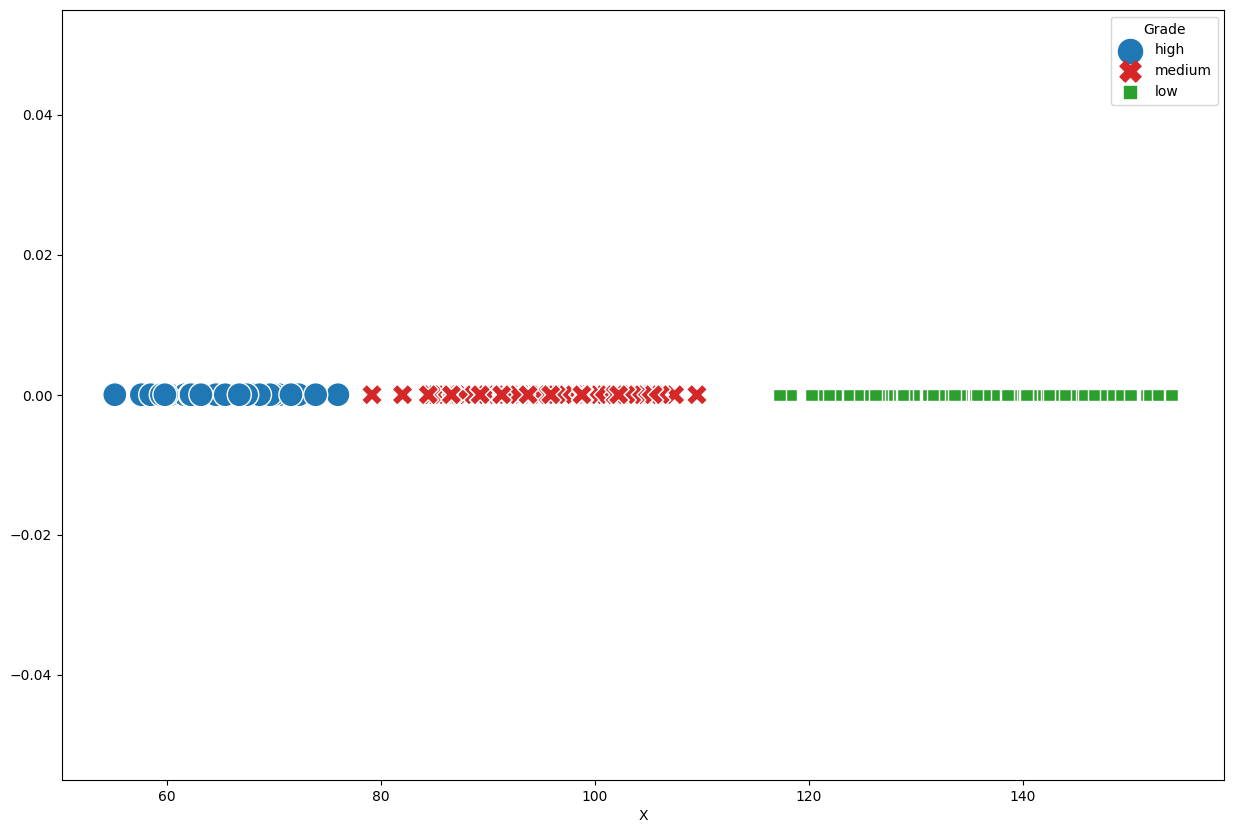

In [9]:
plt.figure(figsize=(15,10))
sbrn.scatterplot(data=samp,x=samp.columns[0],y=[0]*len(samp),hue='Grade',
                palette=[sbrn.color_palette()[0],sbrn.color_palette()[3],sbrn.color_palette()[2]],style='Grade'
                ,size='Grade', sizes=(158,300))

<AxesSubplot: xlabel='X', ylabel='Density'>

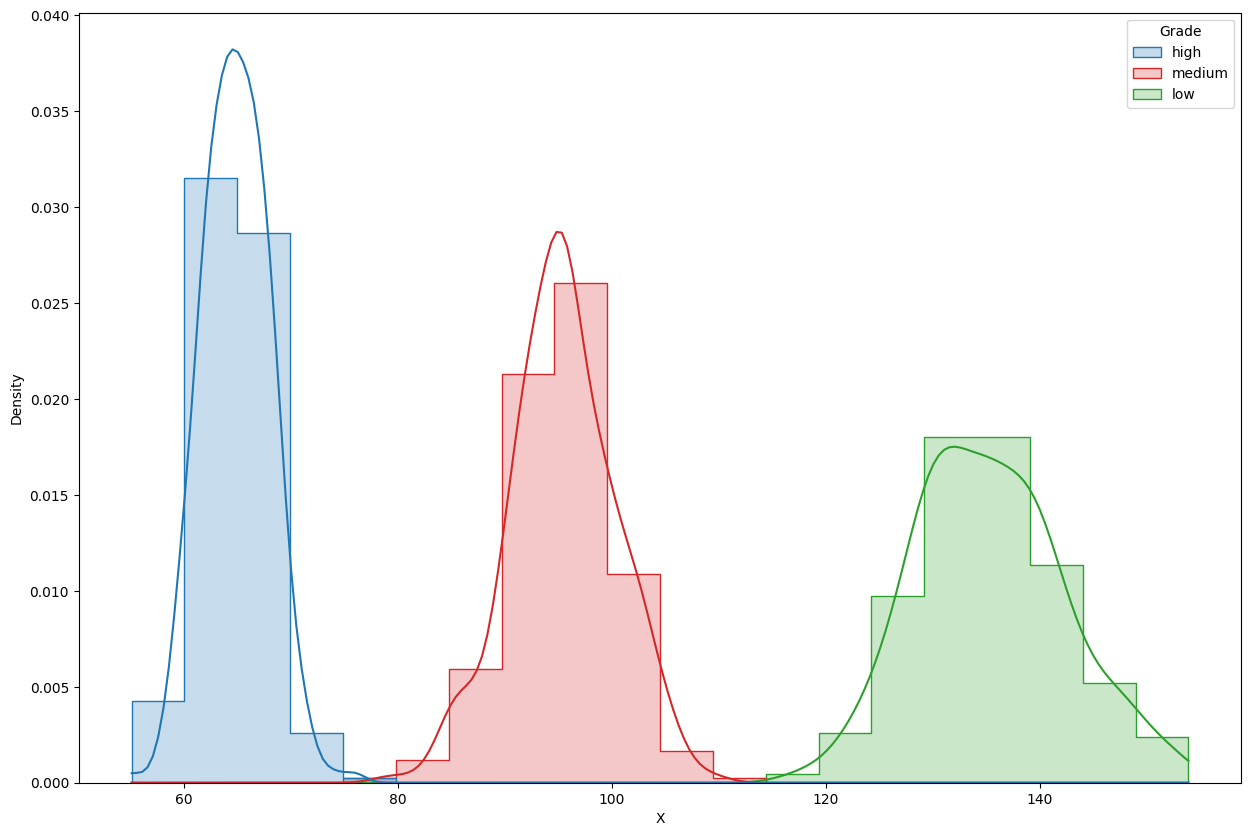

In [10]:
plt.figure(figsize=(15,10))
sbrn.histplot(data=samp,x=samp.columns[0],hue='Grade',stat='density', bins=20,kde=True,
                palette=[sbrn.color_palette()[0],sbrn.color_palette()[3],sbrn.color_palette()[2]]
                ,element='step')

In [11]:
def plot_grid_histplot(data,data_kolom,shape,figure_size):
    
    data_kolom = np.array(data_kolom).reshape(shape[0],shape[1])
    fig, axes = plt.subplots(shape[0],shape[1],figsize=figure_size)

    for i in range(data_kolom.shape[0]):
        for j in range(data_kolom.shape[1]):

                    sbrn.histplot(data=data,x=data_kolom[i,j],hue='Grade',stat='density',bins=10,kde=True,
                 palette=[sbrn.color_palette()[0],sbrn.color_palette()[3],sbrn.color_palette()[2]]
                 ,element='step',ax=axes[i,j])

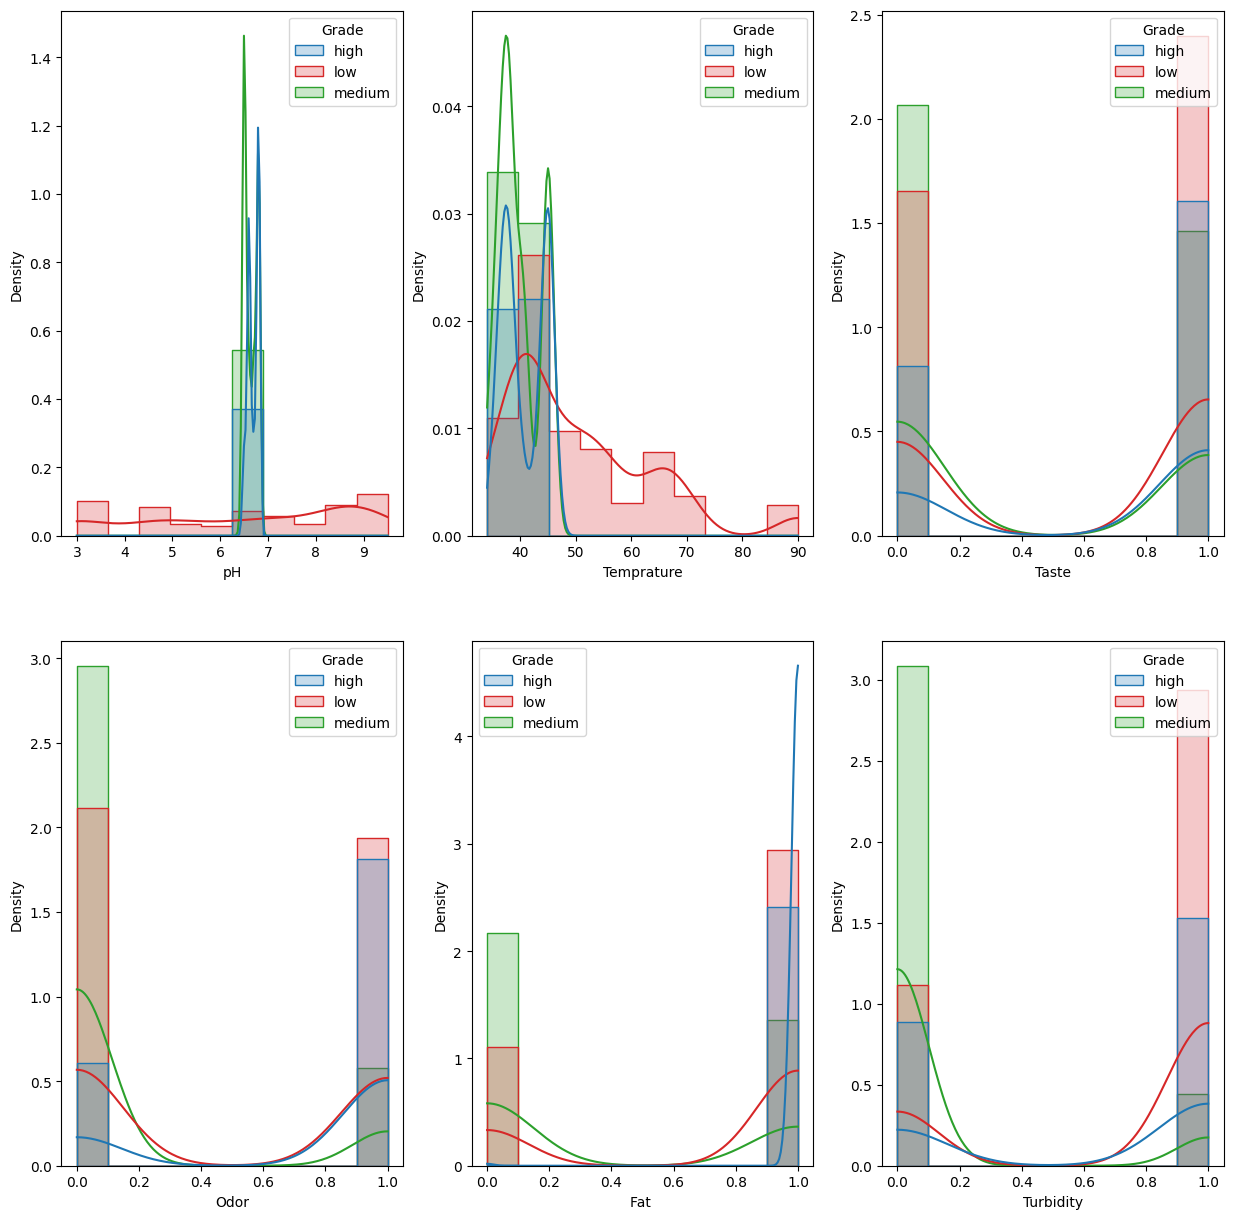

In [12]:
plot_grid_histplot(data,data_kolom,shape=(2,3),figure_size=(15,15))

In [13]:
data_copy = data.replace(to_replace=['high','low', 'medium'],value=[0,1,2],inplace=False)

In [14]:
corr_df = data_copy.corr()
corr_df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,-0.012518
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.094232
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,-0.197629
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,-0.454609
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,-0.501070
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.428017
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.212994
Grade,-0.012518,-0.094232,-0.197629,-0.454609,-0.501070,-0.428017,-0.212994,1.000000


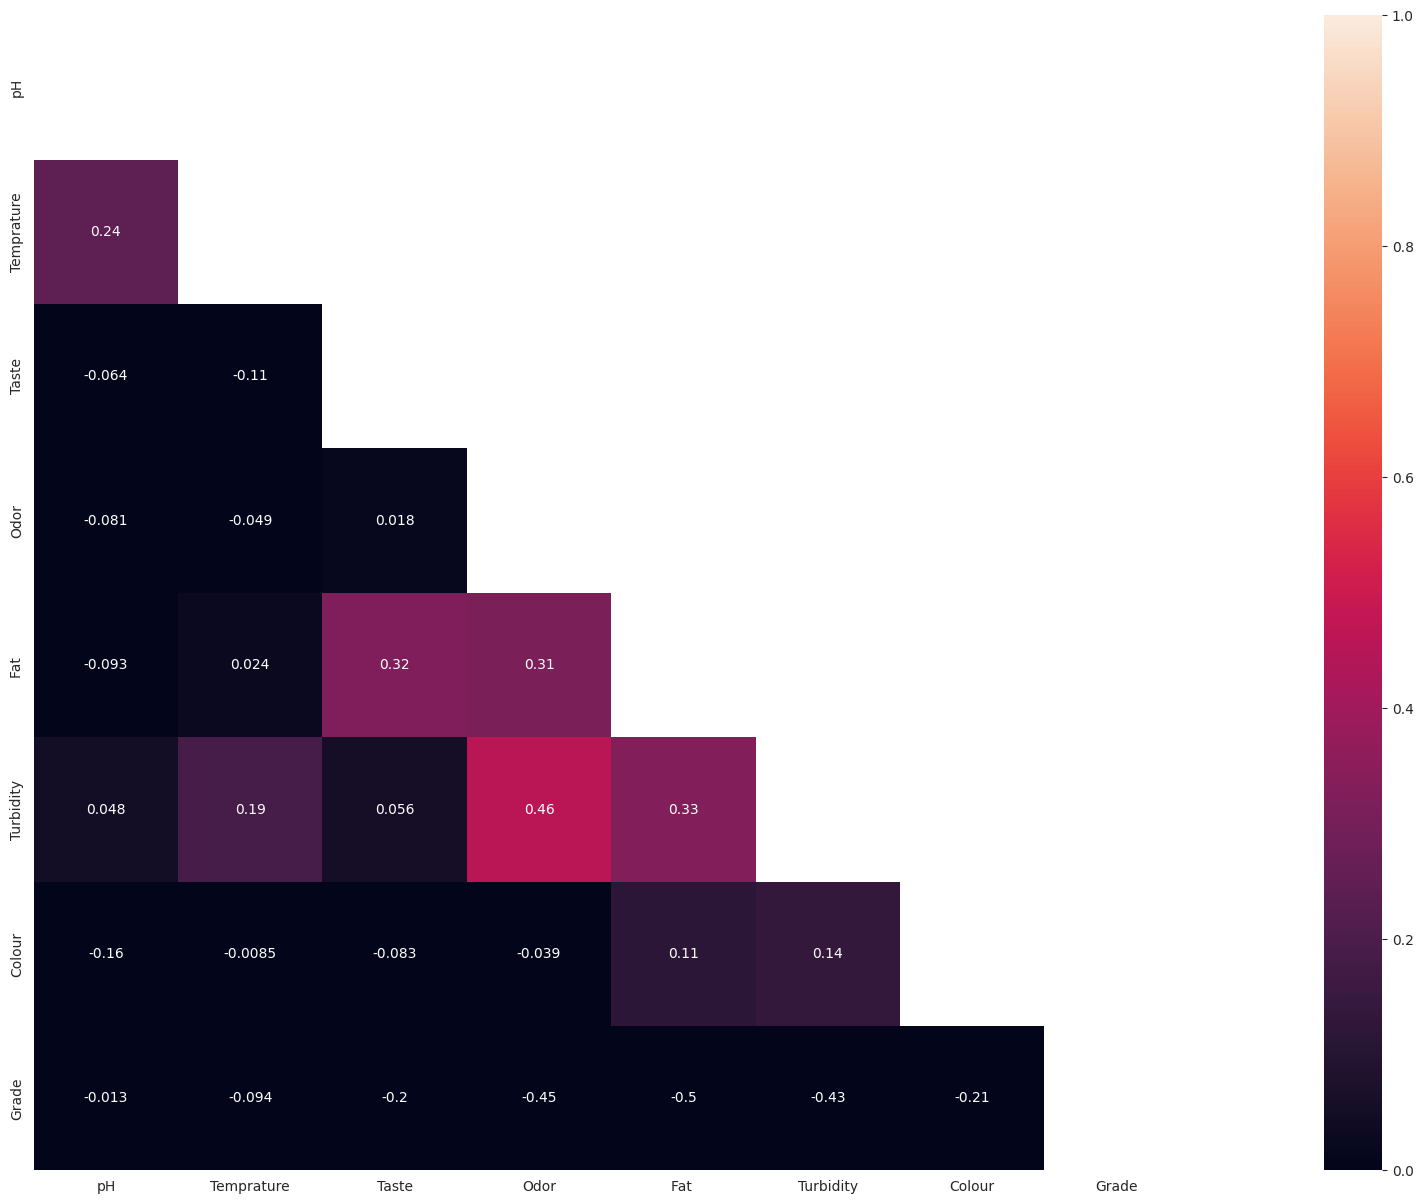

In [15]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sbrn.axes_style("white"):
    f, ax = plt.subplots(figsize=(35,15))
    sbrn.heatmap(data=corr_df,vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [16]:
strong_relation_features = pd.Series(corr_df['Grade']).nlargest(n=5).iloc[1:]
strong_relation_features

pH           -0.012518
Temprature   -0.094232
Taste        -0.197629
Colour       -0.212994
Name: Grade, dtype: float64

In [17]:
Grade = data_copy['Grade']
data_copy = data_copy[list(strong_relation_features.to_dict().keys())]

# data_copy['Grade'] = Grade
# data_copy

In [18]:
data_copy['Grade'] = Grade
data_copy

,pH,Temprature,Taste,Colour,Grade
0,6.6,35.0,1.0,254.0,0
1,6.6,36.0,0.0,253.0,0
2,8.5,70.0,1.0,246.0,1
3,9.5,34.0,1.0,255.0,1
4,6.6,37.0,0.0,255.0,2
...,...,...,...,...,...
1054,6.7,45.0,1.0,247.0,2
1055,6.7,38.0,1.0,255.0,0
1056,3.0,40.0,1.0,255.0,1
1057,6.8,43.0,1.0,250.0,0


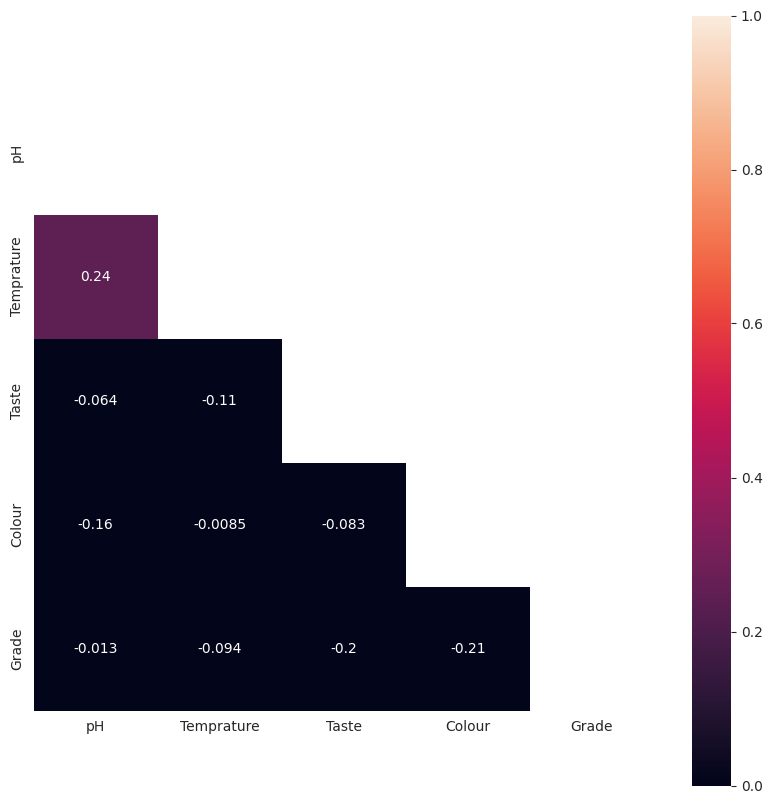

In [19]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sbrn.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,10))
    sbrn.heatmap(data=data_copy.corr(),vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [20]:
data_copy_cov = np.array(data_copy[list(strong_relation_features.to_dict().keys())].cov())
data_copy_cov

array([[ 1.95910121e+00,  3.45847877e+00, -4.46513010e-02,
        -9.92163756e-01],
       [ 3.45847877e+00,  1.01976946e+02, -5.52191049e-01,
        -3.70226575e-01],
       [-4.46513010e-02, -5.52191049e-01,  2.48049396e-01,
        -1.77316225e-01],
       [-9.92163756e-01, -3.70226575e-01, -1.77316225e-01,
         1.85539038e+01]])

In [21]:
data_copy_cov.shape

(4, 4)

In [22]:
data_copy_cov_det = np.linalg.det(data_copy_cov)
data_copy_cov_det

821.7075679728655

In [23]:
data_copy

,pH,Temprature,Taste,Colour,Grade
0,6.6,35.0,1.0,254.0,0
1,6.6,36.0,0.0,253.0,0
2,8.5,70.0,1.0,246.0,1
3,9.5,34.0,1.0,255.0,1
4,6.6,37.0,0.0,255.0,2
...,...,...,...,...,...
1054,6.7,45.0,1.0,247.0,2
1055,6.7,38.0,1.0,255.0,0
1056,3.0,40.0,1.0,255.0,1
1057,6.8,43.0,1.0,250.0,0


In [24]:
data_copy[data_copy['Grade'] == 0].shape[0]

256

In [25]:
data_copy[data_copy['Grade'] == 1].shape[0]

429

In [26]:
data_copy[data_copy['Grade'] == 2].shape[0]

374

In [27]:
class0_data = data_copy[data_copy['Grade'] == 0]
class1_data = data_copy[data_copy['Grade'] == 1]
class2_data = data_copy[data_copy['Grade'] == 2]

class0_training_data = class0_data.iloc[0:int(0.75*len(class0_data))]
class1_training_data = class1_data.iloc[0:int(0.75*len(class1_data))]
class2_training_data = class2_data.iloc[0:int(0.75*len(class2_data))]

class0_cv_data = class0_data.iloc[int(0.75*len(class0_data)):]
class1_cv_data = class1_data.iloc[int(0.75*len(class1_data)):]
class2_cv_data = class2_data.iloc[int(0.75*len(class2_data)):]

training_data = pd.concat([class0_training_data,class1_training_data,class2_training_data])
cv_data = pd.concat([class0_cv_data,class1_cv_data,class2_cv_data])

In [28]:
training_data

,pH,Temprature,Taste,Colour,Grade
0,6.6,35.0,1.0,254.0,0
1,6.6,36.0,0.0,253.0,0
5,6.6,37.0,1.0,255.0,0
14,6.8,45.0,0.0,255.0,0
20,6.6,45.0,0.0,250.0,0
...,...,...,...,...,...
784,6.7,45.0,1.0,247.0,2
785,6.7,45.0,1.0,245.0,2
789,6.8,45.0,0.0,255.0,2
790,6.5,38.0,1.0,255.0,2


In [29]:
cv_data

,pH,Temprature,Taste,Colour,Grade
822,6.6,43.0,1.0,250.0,0
825,6.8,45.0,0.0,255.0,0
827,6.6,38.0,1.0,255.0,0
831,6.6,45.0,0.0,250.0,0
833,6.8,45.0,0.0,255.0,0
...,...,...,...,...,...
1045,6.5,36.0,0.0,247.0,2
1046,6.6,38.0,0.0,255.0,2
1049,6.5,37.0,0.0,255.0,2
1052,6.5,40.0,1.0,250.0,2


C:\Users\user\AppData\Local\Temp\ipykernel_17824\4129244742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbrn.distplot(a=training_data[training_data['Grade'] == 2]['Taste'],color='g')


<AxesSubplot: xlabel='Taste', ylabel='Density'>

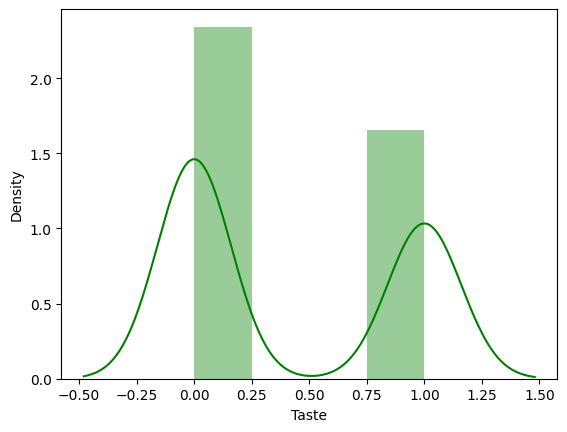

In [30]:
sbrn.distplot(a=training_data[training_data['Grade'] == 2]['Taste'],color='g')

In [31]:
mu_2 = np.mean(training_data[training_data['Grade'] == 2]['Taste'])
sigma_2 = np.std(training_data[training_data['Grade'] == 2]['Taste'])
print(mu_2)
print(sigma_2)

0.4142857142857143
0.4925982757019047


C:\Users\user\AppData\Local\Temp\ipykernel_17824\4144561514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbrn.distplot(a=training_data[training_data['Grade'] == 1]['Taste'],color='r')


<AxesSubplot: xlabel='Taste', ylabel='Density'>

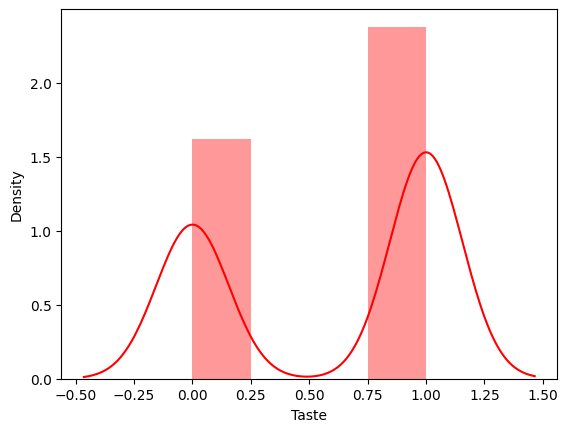

In [32]:
sbrn.distplot(a=training_data[training_data['Grade'] == 1]['Taste'],color='r')

In [33]:
mu_1 = np.mean(training_data[training_data['Grade'] == 1]['Taste'])
sigma_1 = np.std(training_data[training_data['Grade'] == 1]['Taste'])
print(mu_1)
print(sigma_1)

0.5950155763239875
0.490889030490416


C:\Users\user\AppData\Local\Temp\ipykernel_17824\671190205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbrn.distplot(a=training_data[training_data['Grade'] == 0]['Taste'])


<AxesSubplot: xlabel='Taste', ylabel='Density'>

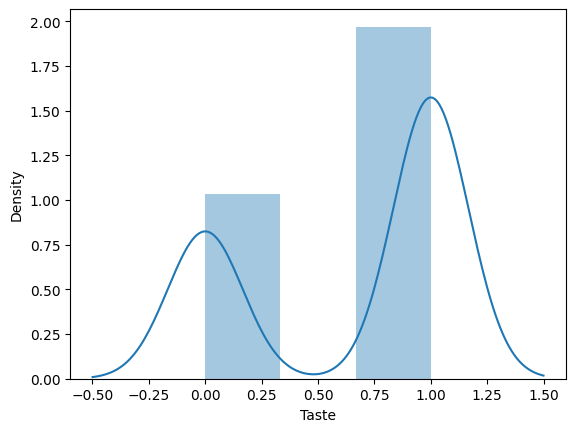

In [34]:
sbrn.distplot(a=training_data[training_data['Grade'] == 0]['Taste'])

In [35]:
mu_0 = np.mean(training_data[training_data['Grade'] == 0]['Taste'])
sigma_0 = np.std(training_data[training_data['Grade'] == 0]['Taste'])
print(mu_0)
print(sigma_0)

0.65625
0.47495887979908324


In [36]:
bivariate_training_data = training_data[['Taste','Temprature','Grade']]
bivariate_training_data

,Taste,Temprature,Grade
0,1.0,35.0,0
1,0.0,36.0,0
5,1.0,37.0,0
14,0.0,45.0,0
20,0.0,45.0,0
...,...,...,...
784,1.0,45.0,2
785,1.0,45.0,2
789,0.0,45.0,2
790,1.0,38.0,2


In [37]:
mu_2 = np.array(bivariate_training_data[bivariate_training_data['Grade'] == 2].iloc[:,0:2].mean())
cov_2 = np.array(bivariate_training_data[bivariate_training_data['Grade'] == 2].iloc[:,0:2].cov())
print(mu_2)
print(cov_2)

[ 0.41428571 39.82857143]
[[ 0.24352279  0.27916027]
 [ 0.27916027 13.46154634]]


In [38]:
mu_1 = np.array(bivariate_training_data[bivariate_training_data['Grade'] == 1].iloc[:,0:2].mean())
cov_1 = np.array(bivariate_training_data[bivariate_training_data['Grade'] == 1].iloc[:,0:2].cov())
print(mu_1)
print(cov_1)

[ 0.59501558 50.87538941]
[[  0.24172508  -1.79749805]
 [ -1.79749805 185.35942368]]


In [39]:
mu_0 = np.array(bivariate_training_data[bivariate_training_data['Grade'] == 0].iloc[:,0:2].mean())
cov_0 = np.array(bivariate_training_data[bivariate_training_data['Grade'] == 0].iloc[:,0:2].cov())
print(mu_0)
print(cov_0)

[ 0.65625 40.5    ]
[[ 0.22676702 -0.28795812]
 [-0.28795812 14.41884817]]


In [40]:
def multivariate_gaussian_plot(mean_vec,cov_mat,X1_min,X1_max,X2_min,X2_max,X3_min,X3_max,p_min=0,p_max=0.2):
    X_1 = np.linspace(X1_min,X1_max,300)
    X_2 = np.linspace(X2_min,X2_max,300)
    X_3 = np.linspace(X3_min,X3_max,300)
    X_1,X_2,X_3 = np.meshgrid(X_1,X_2,X_3)

    data = np.empty(X_1.shape+(3,))

    data[:,:,0] = X_1
    data[:,:,1] = X_2
    data[:,:,2] = X_3

    P_X_equals_x_and_Y_equals_y = s.multivariate_normal.pdf(data,mean=mean_vec,cov=cov_mat)

    fig = plt.figure(figsize=(12,12))
    axes = fig.gca(projection='3d')

    axes.plot_surface(X=X_1,Y=X_2,Q=X_3,Z=P_X_equals_x_and_Y_equals_y,rstride=3,
                      cstride=3,linewidth=1,antialiased=True,cmap=cm.viridis)
    axes.contourf(X=X_1,Y=X_2,Q=X_3,Z=P_X_equals_x_and_Y_equals_y,zdir='z',cmap=cm.viridis,offset=-0.15)
    axes.set_zlim(-0.15,p_max)

    axes.set_zticks(np.linspace(0,p_max,5))
    axes.view_init(27,-21)
    plt.show()

In [41]:
multivariate_gaussian_plot(np.array([0,1,2]),np.array([[1,-0.75],[-0.75,1],[1,-0.75]]),-3,3,-3,4,-3,5)

ValueError: could not broadcast input array from shape (300,300,300) into shape (300,300,3)

In [42]:
mu_2 = np.array(training_data[training_data['Grade'] == 2].iloc[:,0:4].mean())
sigma_2 = np.array(training_data[training_data['Grade'] == 2].iloc[:,0:4].cov())
print(mu_2)
print(cov_2)

[  6.63607143  39.82857143   0.41428571 250.49642857]
[[ 0.24352279  0.27916027]
 [ 0.27916027 13.46154634]]


In [44]:
mu_1 = np.array(training_data[training_data['Grade'] == 1].iloc[:,0:4].mean())
sigma_1 = np.array(training_data[training_data['Grade'] == 1].iloc[:,0:4].cov())
print(mu_1)
print(cov_1)

[  6.60716511  50.87538941   0.59501558 252.74454829]
[[  0.24172508  -1.79749805]
 [ -1.79749805 185.35942368]]


In [47]:
mu_0 = np.array(training_data[training_data['Grade'] == 0].iloc[:,0:4].mean())
sigma_0 = np.array(training_data[training_data['Grade'] == 0].iloc[:,0:4].cov())
print(mu_0)
print(cov_0)

[  6.69114583  40.5          0.65625    252.59375   ]
[[ 0.22676702 -0.28795812]
 [-0.28795812 14.41884817]]


In [48]:
def predict_classes(data):
    
    p_xi_on_class2 = s.multivariate_normal.pdf(data,mu_2,sigma_2)

    p_xi_on_class1 = s.multivariate_normal.pdf(data,mu_1,sigma_1)
    
    p_xi_on_class0 = s.multivariate_normal.pdf(data,mu_0,sigma_0)
    
    p_class1_on_xi = p_xi_on_class1/(p_xi_on_class0 + p_xi_on_class1 + p_xi_on_class2)
    
    return p_class1_on_xi > 0.5

In [49]:
predicted_classes = predict_classes(cv_data.iloc[:,0:4])

In [51]:
confusion_matrix(y_true=cv_data['Grade'],y_pred=predicted_classes)

array([[ 64,   0,   0],
       [  3, 105,   0],
       [ 94,   0,   0]], dtype=int64)

In [52]:
print(classification_report(y_true=cv_data['Grade'],y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57        64
           1       1.00      0.97      0.99       108
           2       0.00      0.00      0.00        94

    accuracy                           0.64       266
   macro avg       0.47      0.66      0.52       266
weighted avg       0.50      0.64      0.54       266



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo